# Visualización de datos 1: Pandas, Matplotlib, Seaborn.

## Pandas

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('temporal.csv')
df.head(10) #Visualizar las primeras 10 filas de datos

,Mes,data science,machine learning,deep learning,categorical
0,2004-01-01,12,18,4,1
1,2004-02-01,12,21,2,1
2,2004-03-01,9,21,2,1
3,2004-04-01,10,16,4,1
4,2004-05-01,7,14,3,1
5,2004-06-01,9,17,3,1
6,2004-07-01,9,16,3,1
7,2004-08-01,7,14,3,1
8,2004-09-01,10,17,4,1
9,2004-10-01,8,17,4,1


In [3]:
df.describe()

,data science,machine learning,deep learning,categorical
count,194.000000,194.000000,194.000000,194.000000
mean,20.953608,27.396907,24.231959,0.257732
std,23.951006,28.091490,34.476887,0.438517
min,4.000000,7.000000,1.000000,0.000000
25%,6.000000,9.000000,2.000000,0.000000
50%,8.000000,13.000000,3.000000,0.000000
75%,26.750000,31.500000,34.000000,1.000000
max,100.000000,100.000000,100.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 5 columns):
Mes                 194 non-null object
data science        194 non-null int64
machine learning    194 non-null int64
deep learning       194 non-null int64
categorical         194 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.7+ KB


In [5]:
df['categorical'].unique()

array([1, 0])

In [6]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [7]:
format_dict = {'data science':'${0:,.2f}', 'Mes':'{:%m-%Y}', 'machine learning':'{:.2%}'}

#Nos aseguramos que la columna Mes tenga formato de fecha
df['Mes'] = pd.to_datetime(df['Mes'])

#Aplicamos el estilo en la visualización
df.head().style.format(format_dict)

,Mes,data science,machine learning,deep learning,categorical
0,01-2004,$12.00,1800.00%,4,1
1,02-2004,$12.00,2100.00%,2,1
2,03-2004,$9.00,2100.00%,2,1
3,04-2004,$10.00,1600.00%,4,1
4,05-2004,$7.00,1400.00%,3,1


In [8]:
format_dict = {'Mes':'{:%m-%Y}'} #Simplificamos el diccionario de formato con valores que sí que tienen sentido para nuestros datos
df.head().style.format(format_dict).highlight_max(color='darkgreen').highlight_min(color='#ff0000')

,Mes,data science,machine learning,deep learning,categorical
0,01-2004,12,18,4,1
1,02-2004,12,21,2,1
2,03-2004,9,21,2,1
3,04-2004,10,16,4,1
4,05-2004,7,14,3,1


In [9]:
df.head(10).style.format(format_dict).background_gradient(subset=['data science', 'machine learning'], cmap='BuGn')

,Mes,data science,machine learning,deep learning,categorical
0,01-2004,12,18,4,1
1,02-2004,12,21,2,1
2,03-2004,9,21,2,1
3,04-2004,10,16,4,1
4,05-2004,7,14,3,1
5,06-2004,9,17,3,1
6,07-2004,9,16,3,1
7,08-2004,7,14,3,1
8,09-2004,10,17,4,1
9,10-2004,8,17,4,1


In [10]:
df.head().style.format(format_dict).bar(color='red', subset=['data science', 'deep learning'])

,Mes,data science,machine learning,deep learning,categorical
0,01-2004,12,18,4,1
1,02-2004,12,21,2,1
2,03-2004,9,21,2,1
3,04-2004,10,16,4,1
4,05-2004,7,14,3,1


In [11]:
df.head(10).style.format(format_dict).background_gradient(subset=['data science', 'machine learning'], cmap='BuGn').highlight_max(color='yellow')

,Mes,data science,machine learning,deep learning,categorical
0,01-2004,12,18,4,1
1,02-2004,12,21,2,1
2,03-2004,9,21,2,1
3,04-2004,10,16,4,1
4,05-2004,7,14,3,1
5,06-2004,9,17,3,1
6,07-2004,9,16,3,1
7,08-2004,7,14,3,1
8,09-2004,10,17,4,1
9,10-2004,8,17,4,1


### Pandas Profiling

In [12]:
from pandas_profiling import ProfileReport

prof = ProfileReport(df)
prof.to_file('informe.html')

## Matplotlib

In [13]:
import matplotlib.pyplot as plt

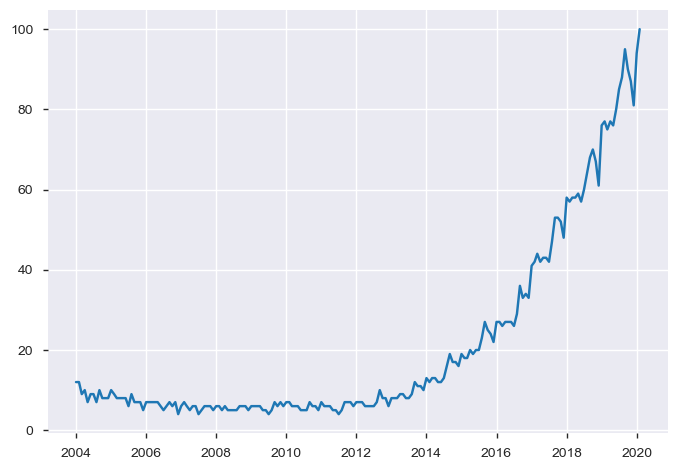

In [14]:
plt.plot(df['Mes'], df['data science'], label='data science')
# El parámetro label es para indicar la leyenda.
# Esto no quiere decir que se muestre, tendremos que usar otro comando que explicaré más adelante.

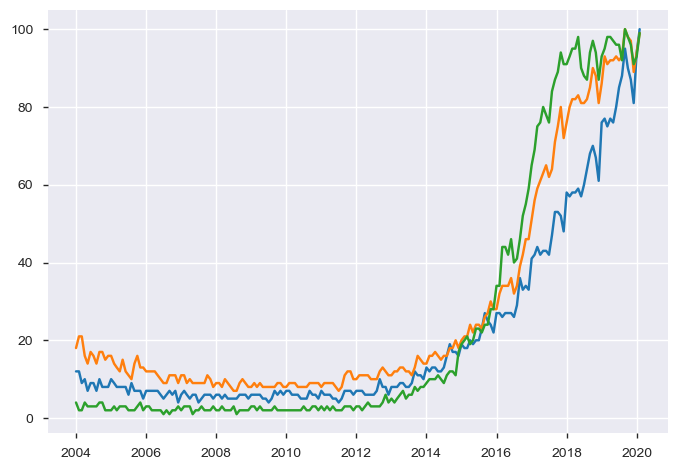

In [15]:
plt.plot(df['Mes'], df['data science'], label='data science')
plt.plot(df['Mes'], df['machine learning'], label='machine learning')
plt.plot(df['Mes'], df['deep learning'], label='deep learning')

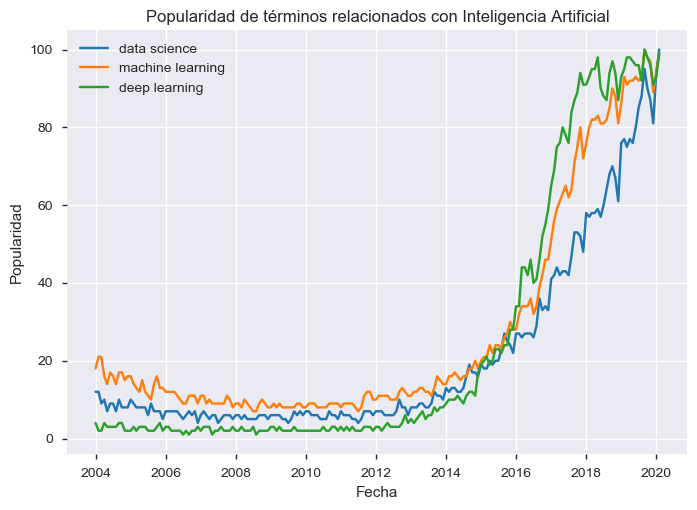

In [16]:
plt.plot(df['Mes'], df['data science'], label='data science')
plt.plot(df['Mes'], df['machine learning'], label='machine learning')
plt.plot(df['Mes'], df['deep learning'], label='deep learning')
plt.xlabel('Fecha')
plt.ylabel('Popularidad')
plt.title('Popularidad de términos relacionados con Inteligencia Artificial')
plt.grid(True)
plt.legend()

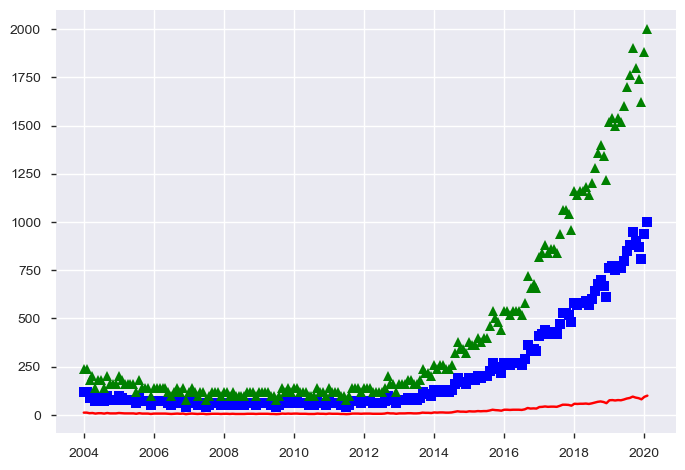

In [17]:
plt.plot(df['Mes'], df['data science'], 'r-')
plt.plot(df['Mes'], df['data science']*10, 'bs')
plt.plot(df['Mes'], df['data science']*20, 'g^')

No handles with labels found to put in legend.


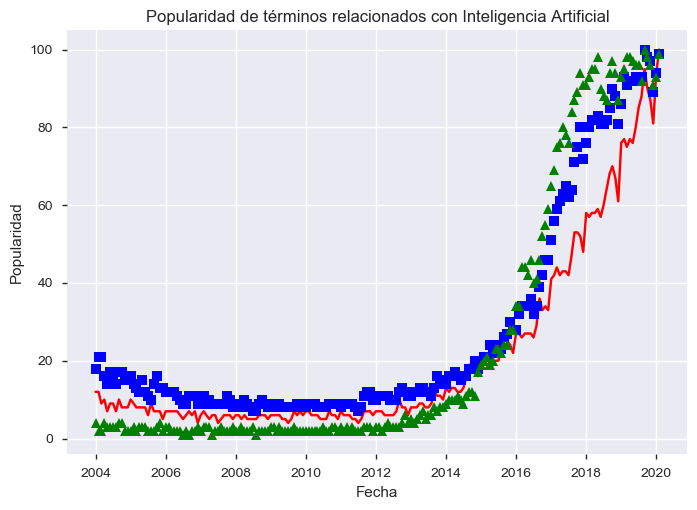

In [18]:
plt.plot(df['Mes'], df['data science'], 'r-')
plt.plot(df['Mes'], df['machine learning'], 'bs')
plt.plot(df['Mes'], df['deep learning'], 'g^')
plt.xlabel('Fecha')
plt.ylabel('Popularidad')
plt.title('Popularidad de términos relacionados con Inteligencia Artificial')
plt.grid(True)
plt.legend()

<BarContainer object of 194 artists>

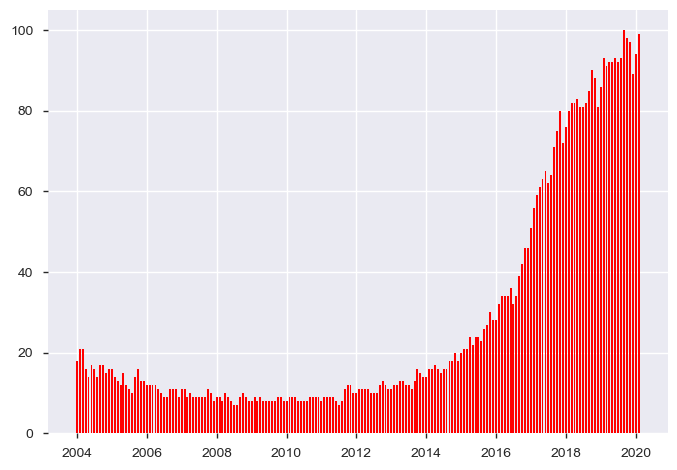

In [19]:
plt.bar(df['Mes'], df['machine learning'], width=20, color='red')

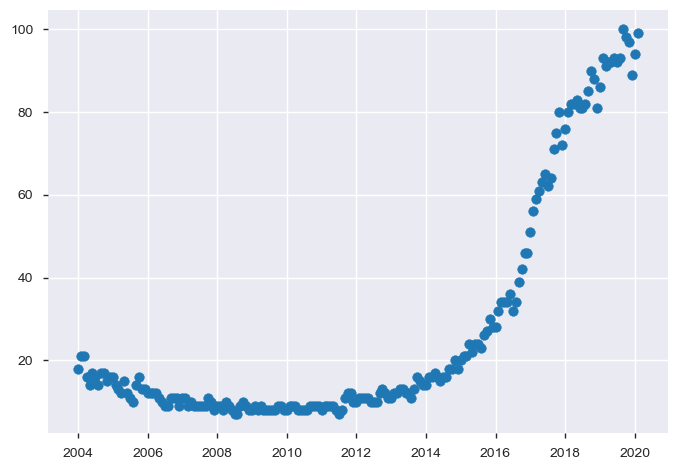

In [20]:
plt.scatter(df['Mes'], df['machine learning'])

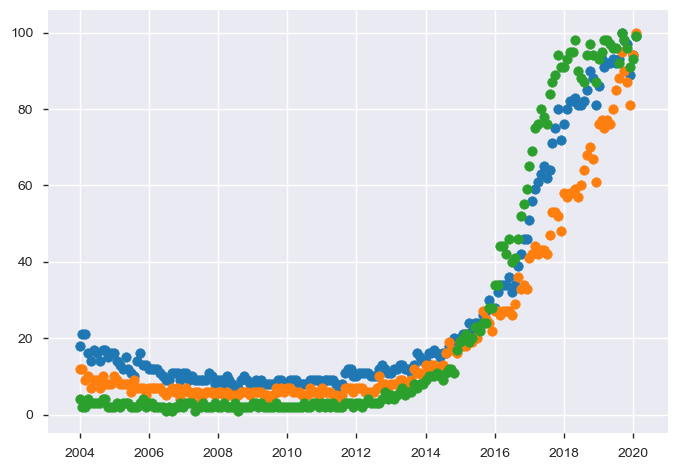

In [21]:
plt.scatter(df['Mes'], df['machine learning'])
plt.scatter(df['Mes'], df['data science'])
plt.scatter(df['Mes'], df['deep learning'])

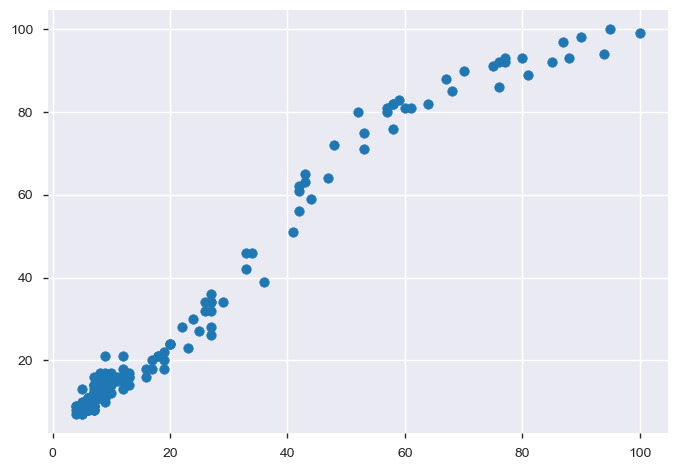

In [22]:
plt.scatter(df['data science'], df['machine learning'])

(array([117.,  14.,   5.,   6.,   2.,   3.,   6.,   1.,   2.,   1.,   1.,
          5.,   1.,  13.,  17.]),
 array([  1. ,   7.6,  14.2,  20.8,  27.4,  34. ,  40.6,  47.2,  53.8,
         60.4,  67. ,  73.6,  80.2,  86.8,  93.4, 100. ]),
 <a list of 15 Patch objects>)

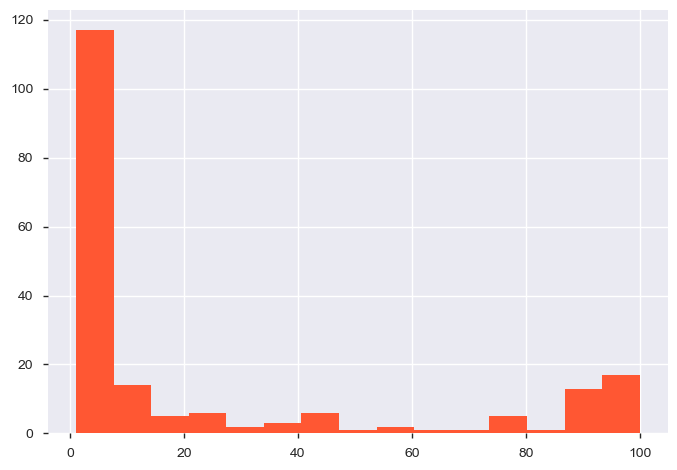

In [23]:
plt.hist(df['deep learning'], bins=15, color='#FF5733')

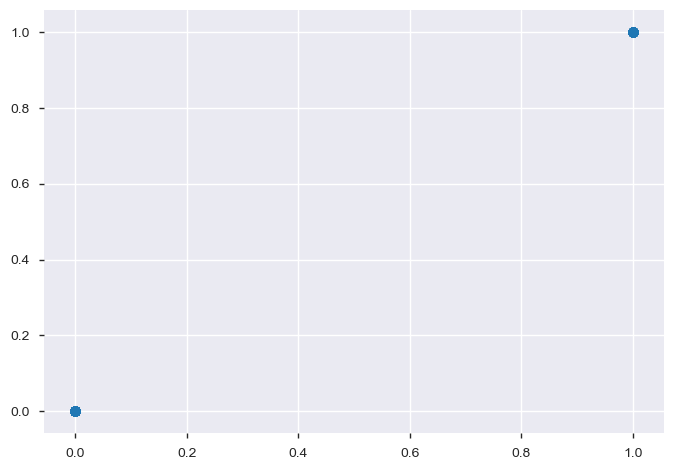

In [24]:
plt.scatter(df['categorical'], df['categorical'])

(array([144.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  50.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

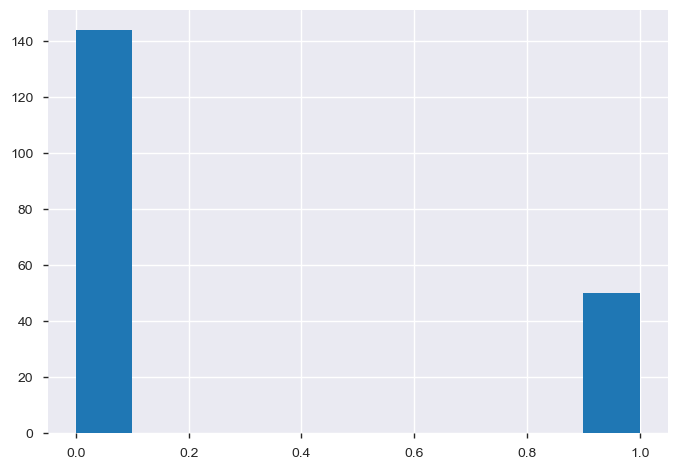

In [25]:
plt.hist(df['categorical'])

In [26]:
import numpy as np 
np.random.seed(444) 
data = np.random.choice(  
         a=[0, 1, 2],  
         size=50,  
         p=[0.5, 0.3, 0.2])  

(array([22.,  0.,  0.,  0.,  0., 16.,  0.,  0.,  0., 12.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

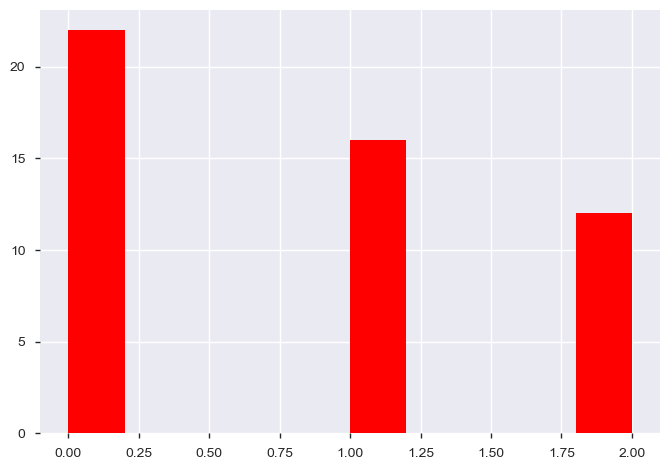

In [27]:
plt.hist(data, color=['red'])

(-1.2142507666786346,
 1.134711077927507,
 -1.1258468317413044,
 1.101230806657754)

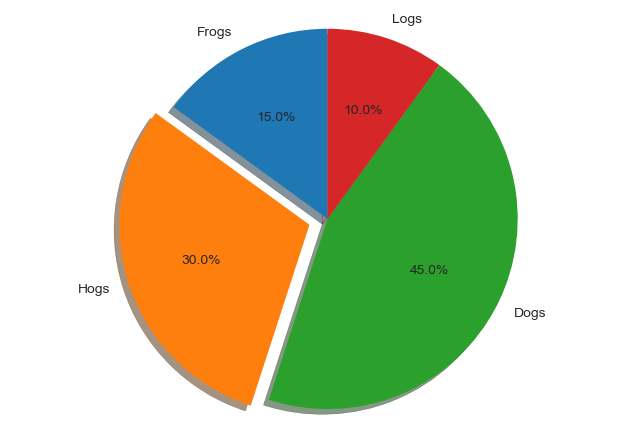

In [28]:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

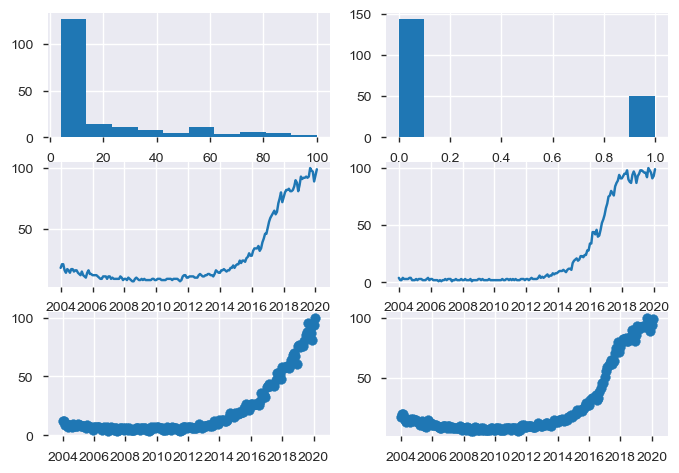

In [29]:
fig, axes = plt.subplots(3,2)
axes[0, 0].hist(df['data science'])
axes[0, 1].hist(df['categorical'])
axes[1, 0].plot(df['Mes'], df['machine learning'])
axes[1, 1].plot(df['Mes'], df['deep learning'])
axes[2, 0].scatter(df['Mes'], df['data science'])
axes[2, 1].scatter(df['Mes'], df['machine learning'])

Text(2006-01-01, 50, 'Aquí pasa algo!')

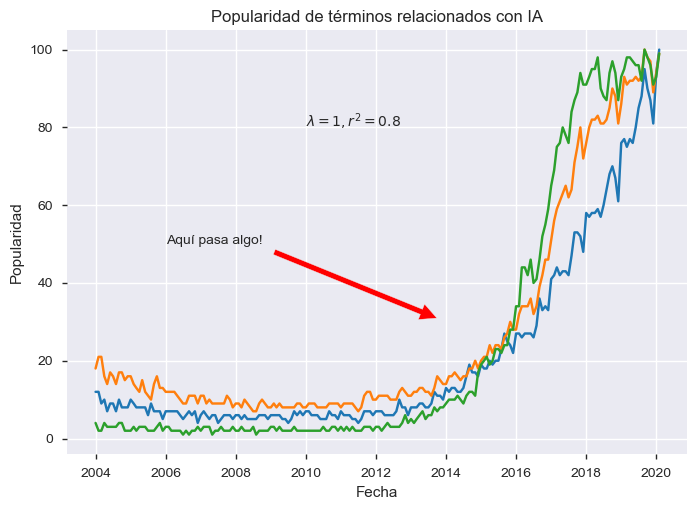

In [30]:
plt.plot(df['Mes'], df['data science'], label='data science')
plt.plot(df['Mes'], df['machine learning'], label='machine learning')
plt.plot(df['Mes'], df['deep learning'], label='deep learning')
plt.xlabel('Fecha')
plt.ylabel('Popularidad')
plt.title('Popularidad de términos relacionados con IA')
plt.grid(True)
plt.text(x='2010-01-01',
         y=80,
         s=r'$\lambda=1, r^2=0.8$') #Las coordenadas usan las mismas unidades que el gráfico
plt.annotate('Aquí pasa algo!',
             xy=('2014-01-01', 30),
             xytext=('2006-01-01', 50),
             arrowprops={'facecolor':'red', 'shrink':0.05})

{'whiskers': [<matplotlib.lines.Line2D at 0x11a09e0b8>,
 'caps': [<matplotlib.lines.Line2D at 0x11a09e7b8>,
 'boxes': [<matplotlib.lines.Line2D at 0x119e9ad30>],
 'medians': [<matplotlib.lines.Line2D at 0x11a09eef0>],
 'fliers': [<matplotlib.lines.Line2D at 0x11a0a52b0>],
 'means': []}

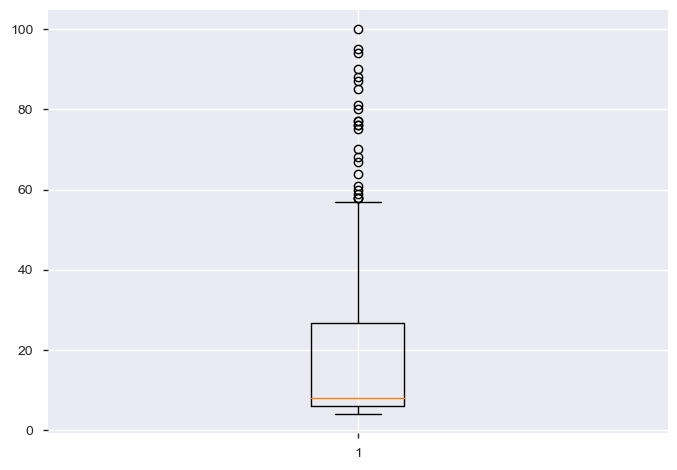

In [31]:
plt.boxplot(df['data science'])

{'whiskers': [<matplotlib.lines.Line2D at 0x11a116668>,
 'caps': [<matplotlib.lines.Line2D at 0x11a116cf8>,
 'boxes': [<matplotlib.lines.Line2D at 0x11a116320>],
 'medians': [<matplotlib.lines.Line2D at 0x11a11f438>],
 'fliers': [<matplotlib.lines.Line2D at 0x11a11f7b8>],
 'means': []}

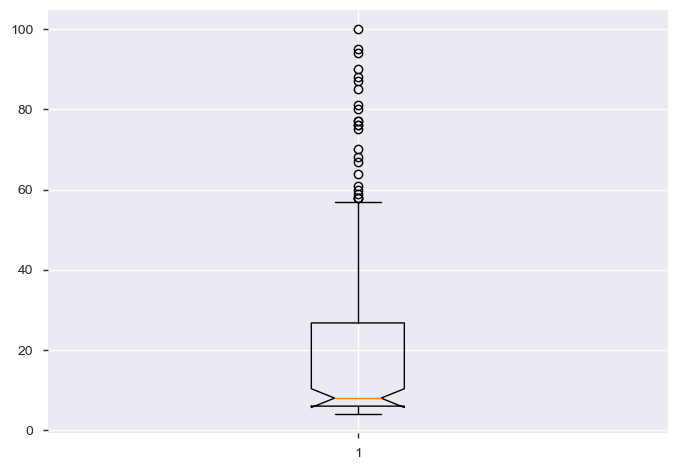

In [32]:
plt.boxplot(df['data science'], notch=True, sym="o")

{'whiskers': [<matplotlib.lines.Line2D at 0x11a2ac780>,
 'caps': [<matplotlib.lines.Line2D at 0x11a2ace48>,
 'boxes': [<matplotlib.lines.Line2D at 0x11a2ac438>,
 'medians': [<matplotlib.lines.Line2D at 0x11a3e8588>,
 'fliers': [<matplotlib.lines.Line2D at 0x11a3e8908>,
 'means': []}

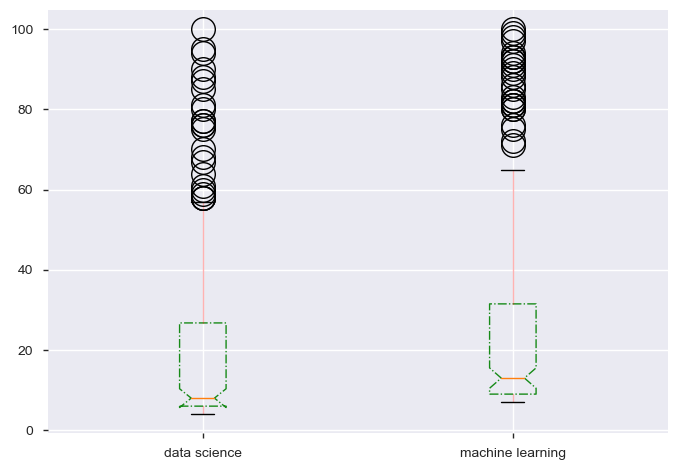

In [33]:
line_props = dict(color="r", alpha=0.3)
bbox_props = dict(color="g", alpha=0.9, linestyle="dashdot")
flier_props = dict(marker="o", markersize=17)

plt.boxplot((df['data science'],
             df['machine learning']),
            notch=True,
            sym="o",
            labels=["data science", "machine learning"],
            whiskerprops=line_props,
            boxprops=bbox_props,
            flierprops=flier_props)

(array([127.,  14.,  11.,   8.,   5.,  11.,   4.,   6.,   5.,   3.]),
 array([  4. ,  13.6,  23.2,  32.8,  42.4,  52. ,  61.6,  71.2,  80.8,
         90.4, 100. ]),
 <a list of 10 Patch objects>)

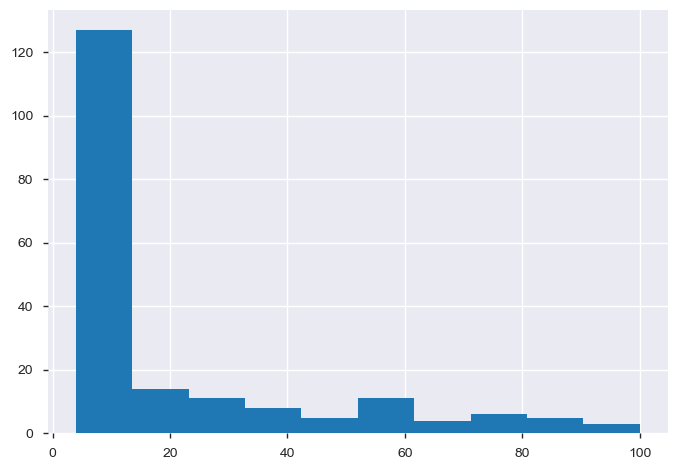

In [34]:
plt.hist(df['data science']) #No hay normalidad

## Seaborn

In [35]:
import seaborn as sns

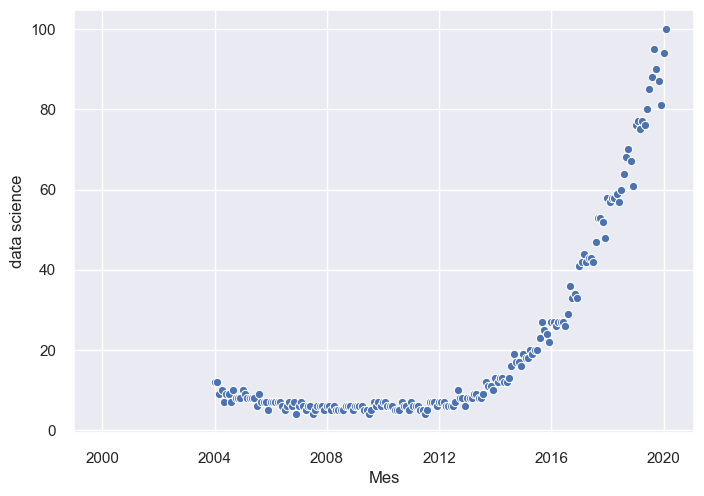

In [36]:
sns.set()
sns.scatterplot(df['Mes'], df['data science'])

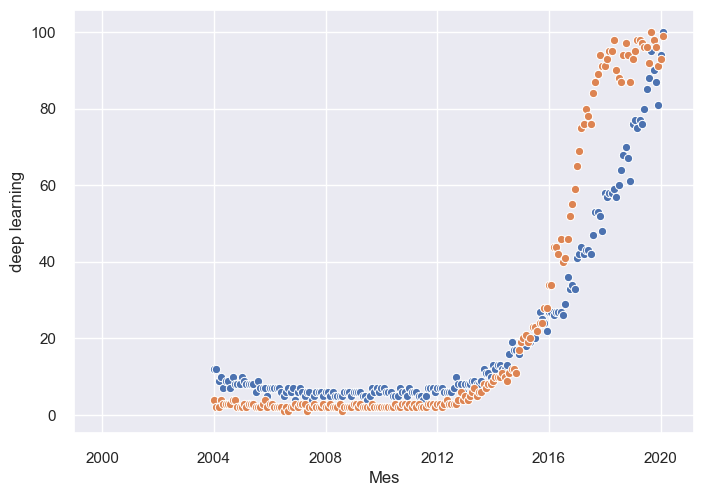

In [37]:
sns.scatterplot(df['Mes'], df['data science'])
sns.scatterplot(df['Mes'], df['deep learning'])

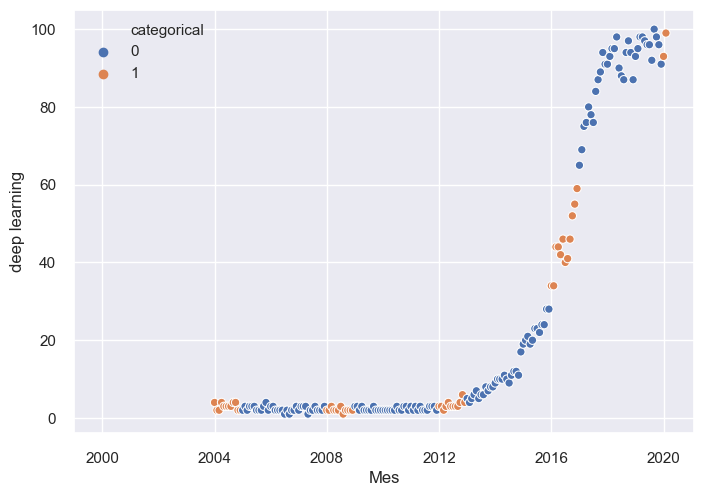

In [40]:
sns.scatterplot(x=df['Mes'], y=df['deep learning'], data=df, hue='categorical')

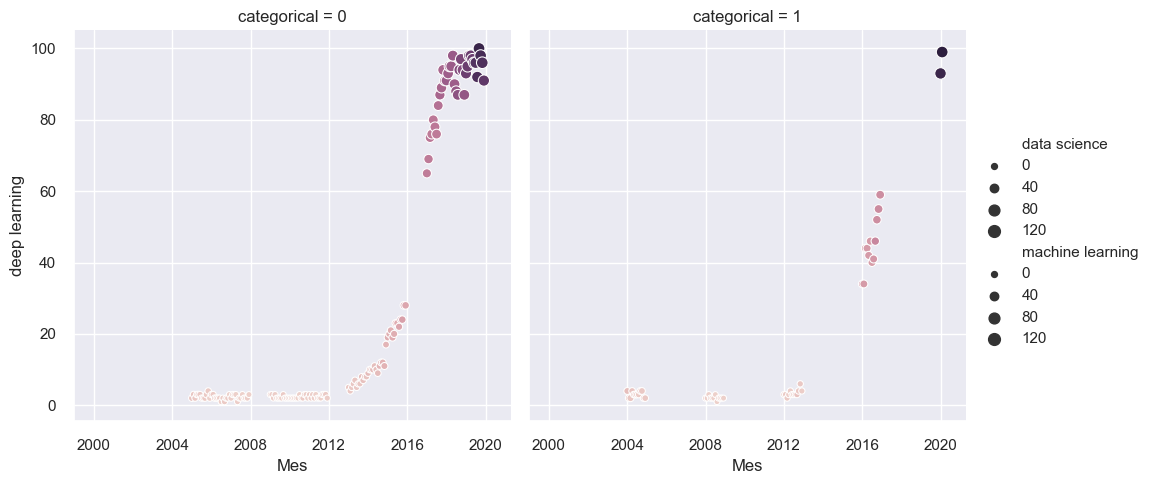

In [113]:
sns.relplot(x='Mes',
            y='deep learning',
            hue='data science',
            size='machine learning',
            col='categorical',
            data=df)

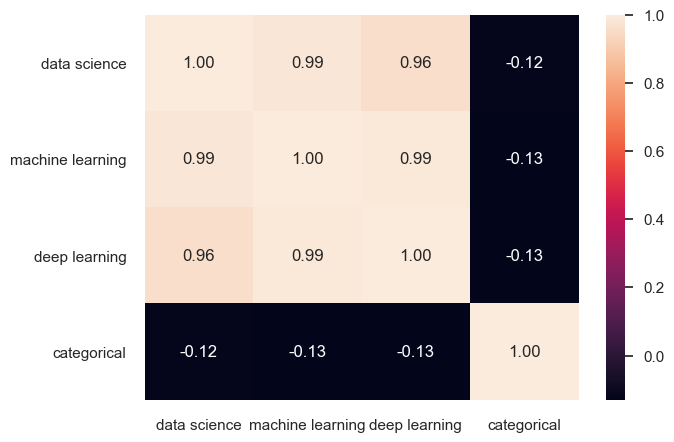

In [130]:
f, ax = plt.subplots(figsize=(7, 5))
sns.heatmap(df.corr(), annot=True, fmt='.2f')

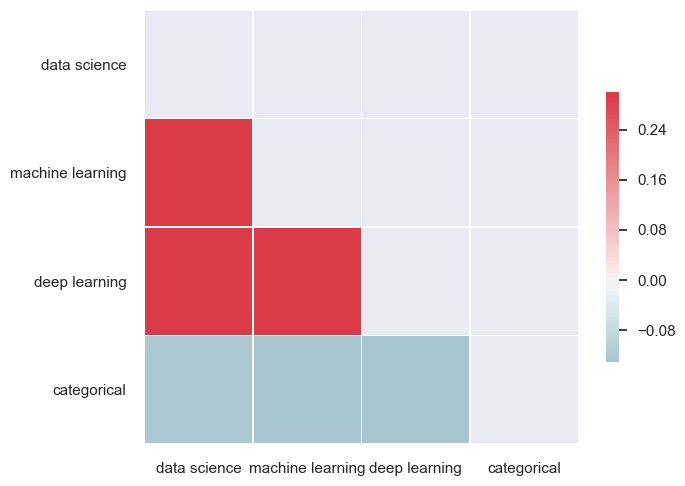

In [126]:
# Generate a mask for the upper triangle
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(7, 7))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df.corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [132]:
cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

df.corr().style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magnify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,data science,machine learning,deep learning,categorical
data science,1,0.99,0.96,-0.12
machine learning,0.99,1,0.99,-0.13
deep learning,0.96,0.99,1,-0.13
categorical,-0.12,-0.13,-0.13,1


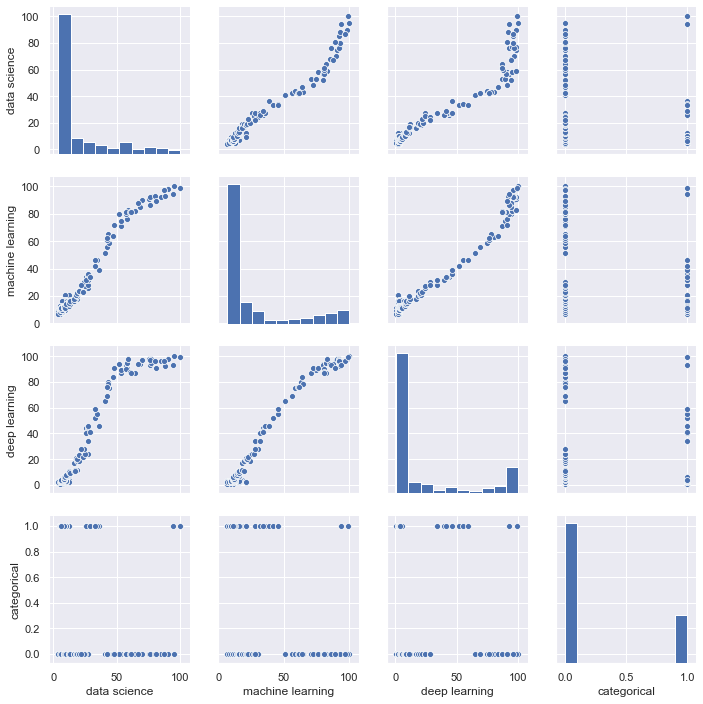

In [46]:
sns.pairplot(df)

/Users/miguel/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/miguel/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


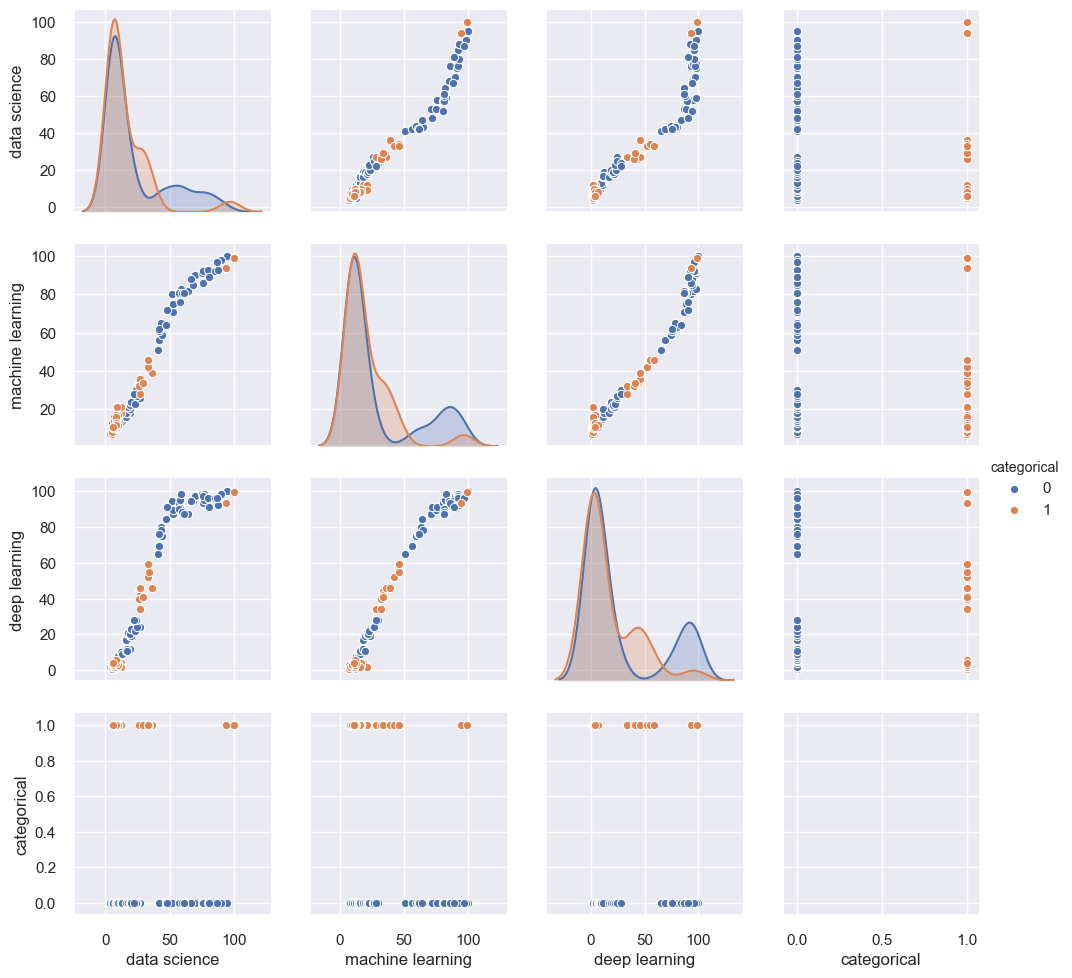

In [114]:
sns.pairplot(df, hue='categorical')

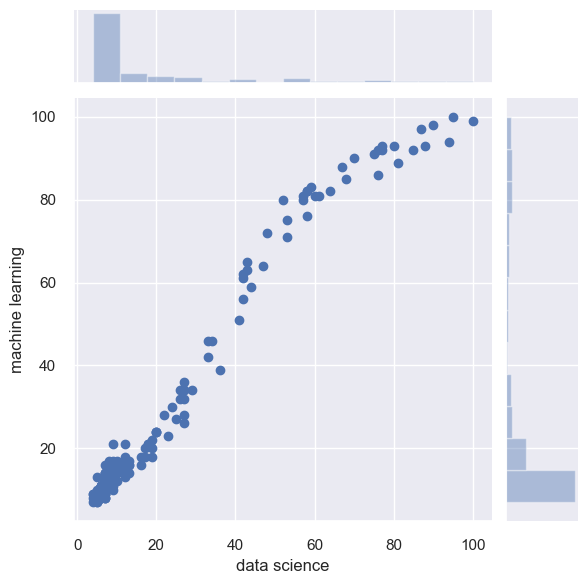

In [116]:
sns.jointplot(x='data science', y='machine learning', data=df)

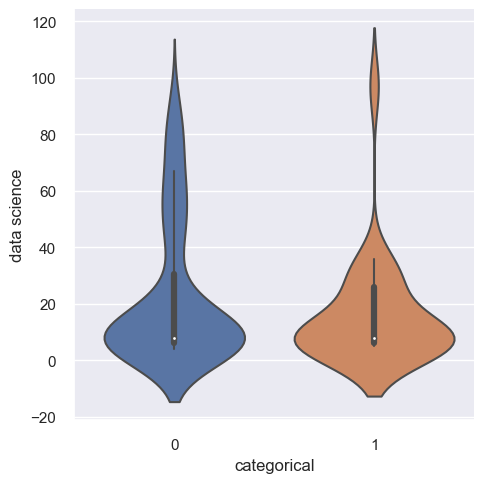

In [117]:
sns.catplot(x='categorical', y='data science', kind='violin', data=df)

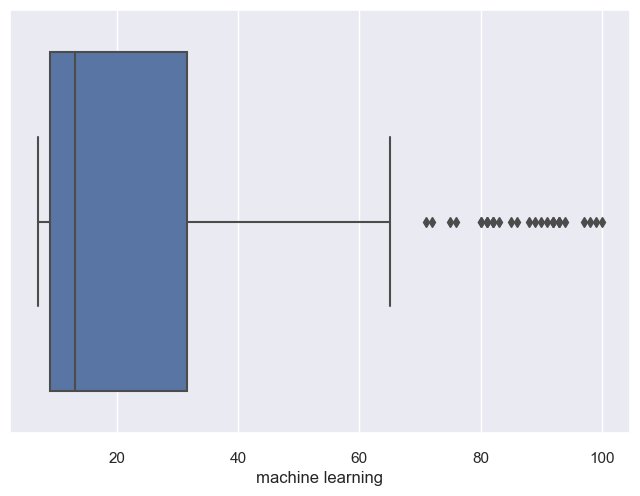

In [124]:
sns.boxplot(x='machine learning', data=df)

Text(0.5, 1.0, 'Machine Learning')

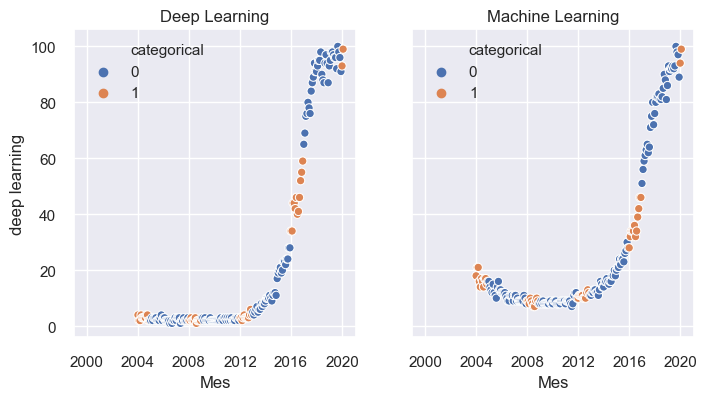

In [118]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(8, 4))
sns.scatterplot(x="Mes", y="deep learning", hue="categorical", data=df, ax=axes[0])
axes[0].set_title('Deep Learning')
sns.scatterplot(x="Mes", y="machine learning", hue="categorical", data=df, ax=axes[1])
axes[1].set_title('Machine Learning')